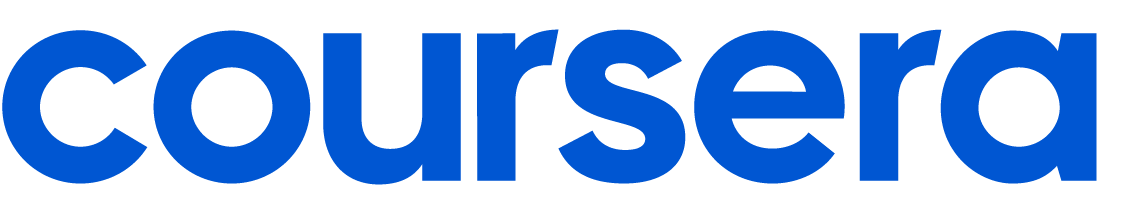

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [25]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [52]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [54]:
train_df = pd.read_csv("train.csv")
train_df.shape

(413955, 37)

In [55]:
test_df = pd.read_csv("test.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [56]:
# your code here (optional)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

In [57]:
# Looking for missing data
missing_data=train_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    
train_df = train_df.dropna()
train_df.info()

subscription_id
False    413955
Name: subscription_id, dtype: int64

observation_dt
False    413955
Name: observation_dt, dtype: int64

is_retained
False    413954
True          1
Name: is_retained, dtype: int64

specialization_id
False    413954
True          1
Name: specialization_id, dtype: int64

cnt_courses_in_specialization
False    413954
True          1
Name: cnt_courses_in_specialization, dtype: int64

specialization_domain
False    413953
True          2
Name: specialization_domain, dtype: int64

is_professional_certificate
False    413954
True          1
Name: is_professional_certificate, dtype: int64

is_gateway_certificate
False    413954
True          1
Name: is_gateway_certificate, dtype: int64

learner_days_since_registration
False    413954
True          1
Name: learner_days_since_registration, dtype: int64

learner_country_group
False    413954
True          1
Name: learner_country_group, dtype: int64

learner_gender
False    413954
True          1
Name: learner_gende

In [58]:
# Selecting and Preparing the Feature Set and Target
X = train_df[["cnt_courses_in_specialization", "specialization_domain", "is_professional_certificate", "is_gateway_certificate", "learner_days_since_registration",  
        "learner_country_group", "learner_gender", "learner_cnt_other_courses_active", "learner_cnt_other_courses_paid_active", "learner_cnt_other_courses_items_completed", 
       "learner_cnt_other_courses_paid_items_completed", "learner_other_revenue", "subscription_period_order", "cnt_enrollments_started_before_payment_period", 
       "cnt_enrollments_completed_before_payment_period", "cnt_enrollments_active_before_payment_period", "cnt_items_completed_before_payment_period", 
       "cnt_graded_items_completed_before_payment_period", "is_subscription_started_with_free_trial", "cnt_enrollments_started_during_payment_period", 
       "cnt_enrollments_completed_during_payment_period", "cnt_enrollments_active_during_payment_period", "cnt_items_completed_during_payment_period", 
       "cnt_graded_items_completed_during_payment_period", "is_active_capstone_during_pay_period", "cnt_days_active_before_payment_period", "cnt_days_active_during_payment_period"]].values
y=train_df[["is_retained"]]
X_test_data = test_df[["cnt_courses_in_specialization", "specialization_domain", "is_professional_certificate", "is_gateway_certificate", "learner_days_since_registration",  
        "learner_country_group", "learner_gender", "learner_cnt_other_courses_active", "learner_cnt_other_courses_paid_active", "learner_cnt_other_courses_items_completed", 
       "learner_cnt_other_courses_paid_items_completed", "learner_other_revenue", "subscription_period_order", "cnt_enrollments_started_before_payment_period", 
       "cnt_enrollments_completed_before_payment_period", "cnt_enrollments_active_before_payment_period", "cnt_items_completed_before_payment_period", 
       "cnt_graded_items_completed_before_payment_period", "is_subscription_started_with_free_trial", "cnt_enrollments_started_during_payment_period", 
       "cnt_enrollments_completed_during_payment_period", "cnt_enrollments_active_during_payment_period", "cnt_items_completed_during_payment_period", 
       "cnt_graded_items_completed_during_payment_period", "is_active_capstone_during_pay_period", "cnt_days_active_before_payment_period", "cnt_days_active_during_payment_period"]].values

X[0:5], y[0:5]

(array([[8.0, 'Data Science', True, True, 2321.0, 'Northern Europe',
         'female', 8.0, 0.0, 88.0, 0.0, 0.0, 6.0, 5.0, 4.0, 5.0, 427.0,
         22.0, False, 0.0, 0.0, 0.0, 0.0, 0.0, False, 68.0, 0.0],
        [6.0, 'Data Science', True, False, 612.0, 'Northern Europe',
         'female', 52.0, 2.0, 209.0, 75.0, 49.41, 1.0, 1.0, 0.0, 1.0,
         13.0, 3.0, True, 0.0, 0.0, 0.0, 0.0, 0.0, False, 7.0, 2.0],
        [6.0, 'Business', True, True, 27.0, 'Australia and New Zealand',
         'unknown', 5.0, 0.0, 5.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 13.0,
         2.0, True, 0.0, 0.0, 1.0, 12.0, 2.0, False, 2.0, 1.0],
        [5.0, 'Information Technology', True, True, 120.0,
         'United States', 'male', 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 1.0,
         2.0, 234.0, 11.0, True, 1.0, 0.0, 2.0, 83.0, 9.0, False, 18.0,
         4.0],
        [8.0, 'Data Science', True, True, 1228.0, 'India', 'unknown', 0.0,
         0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 1.0, 3.0, 109.0, 7.0, True, 1.0,
         1

In [59]:
#train_df.team.unique()
for col in train_df:
  print(train_df[col].unique())

['--rKikbGEeyQHQqIvaM5IQ' '-0XGzEq2EeyimBISGRuNeQ'
 '-1P9kOb6EeuRugq1Liq62w' ... 'qfjlwk4LEeuoQBI_iUz8bQ'
 'qfnRCjb9Eeyw2QrDB7Ax2w' 'qgTfcUejEeypOxKzLL0dUw']
['2022-05-04' '2021-11-30' '2021-08-13' '2021-08-03' '2021-06-04'
 '2021-03-24' '2021-07-24' '2021-07-15' '2021-02-04' '2021-10-11'
 '2021-04-09' '2021-06-11' '2021-06-07' '2021-10-28' '2021-04-28'
 '2021-10-25' '2021-03-06' '2021-02-11' '2021-09-04' '2021-07-28'
 '2021-07-02' '2021-05-17' '2022-01-21' '2021-09-11' '2021-10-06'
 '2021-05-15' '2021-12-21' '2021-06-24' '2021-10-08' '2021-12-28'
 '2022-01-13' '2021-10-23' '2022-01-03' '2021-10-27' '2021-10-12'
 '2021-12-15' '2021-12-08' '2021-09-23' '2021-08-05' '2021-05-09'
 '2022-01-27' '2021-03-03' '2021-09-22' '2021-03-13' '2021-07-27'
 '2021-12-02' '2021-06-27' '2021-05-06' '2021-12-07' '2021-06-01'
 '2021-03-10' '2022-02-06' '2021-07-06' '2021-11-01' '2021-11-28'
 '2021-11-05' '2021-08-08' '2021-08-14' '2021-09-16' '2021-10-15'
 '2021-05-22' '2021-04-26' '2021-04-14' '2021-05-0

[  0.   1.   2.   4.   7.   3.  13.  21.   5.  14.  18.  11.   8.  10.
  19.  25.  35.  34.  33.  17.   9.  16.  27.  89.  69.  26.  39.   6.
  15.  31.  23.  47.  46.  51.  22.  20.  12.  44.  49.  29.  68.  50.
  58.  42. 101.  41.  40.  24.  52.  45.  70.  94.  32.  53.  28.  88.
  37. 110.  38.  57.  36. 152.  65.  56.  48.  30.  59.  86.  71. 102.
  55. 135.  54.  72.  77.  61.  92.  62. 100.  60. 108.  85. 112.  76.
 207.  67.  43.  82. 111.  74.  96. 141.  63. 208.  64.  84.  75.  78.
  91.  98. 138. 105.  99. 123.  93.  73. 117. 130. 134.  80.  95. 132.
 118. 129. 109. 103. 217. 159.  87. 146. 474. 183. 131.  97. 142. 104.
 176. 115. 106. 229. 169. 196. 107.  90. 128. 120.  66. 144.  81. 119.
 116. 254.  83.  79. 180. 121. 122. 321. 296. 242. 170. 114. 139. 153.
 172. 127. 136. 150. 268. 206. 248. 155. 195. 263. 238. 143. 156. 274.
 241. 193. 161. 126. 334. 253. 210. 137. 171. 194. 240. 221. 314. 133.
 145. 113. 273. 125. 201. 154. 258. 163. 178. 124. 226.]
[   0.     49.41   7

In [34]:
# preprocessing categorical variables
from sklearn import preprocessing
specialization_domain = preprocessing.LabelEncoder()
specialization_domain.fit(['Data Science', 'Business', 'Information Technology', 'Computer Science', 'Arts and Humanities',
                           'Language Learning', 'Health', 'Physical Science and Engineering', 'Social Sciences', 'Personal Development', 'Math and Logic'])
X[:,1]=specialization_domain.transform(X[:,1])

is_professional_certificate = preprocessing.LabelEncoder()
is_professional_certificate.fit([True, False])
X[:,2]=is_professional_certificate.transform(X[:,2])

is_gateway_certificate = preprocessing.LabelEncoder()
is_gateway_certificate.fit([True, False])
X[:,3]=is_gateway_certificate.transform(X[:,3])

geography=preprocessing.LabelEncoder()
geography.fit(['Northern Europe', 'Australia and New Zealand', 'United States', 'India', 'East Asia', 
               'Eastern Europe', 'Southern Europe', 'Southeast Asia', 'Middle East', 'Africa and developing Middle East',
               'China', 'Canada', 'Non-Brazil Latin America', 'Brazil', 'Russia and neighbors'])
X[:,5]=geography.transform(X[:,5])

gender = preprocessing.LabelEncoder()
gender.fit(['female', 'unknown', 'male', 'other'])
X[:,6]=gender.transform(X[:,6])

is_subscription_started_with_free_trial = preprocessing.LabelEncoder()
is_subscription_started_with_free_trial.fit([True, False])
X[:,18]=is_subscription_started_with_free_trial.transform(X[:,18])

is_active_capstone_during_pay_period = preprocessing.LabelEncoder()
is_active_capstone_during_pay_period.fit([True, False])
X[:,24]=is_active_capstone_during_pay_period.transform(X[:,24])

In [35]:
X[0:5], y[0:5]

(array([[8.0, 3, 1, 1, 2321.0, 10, 0, 8.0, 0.0, 88.0, 0.0, 0.0, 6.0, 5.0,
         4.0, 5.0, 427.0, 22.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 68.0, 0.0],
        [6.0, 3, 1, 0, 612.0, 10, 0, 52.0, 2.0, 209.0, 75.0, 49.41, 1.0,
         1.0, 0.0, 1.0, 13.0, 3.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 7.0,
         2.0],
        [6.0, 1, 1, 1, 27.0, 1, 3, 5.0, 0.0, 5.0, 0.0, 0.0, 1.0, 1.0, 0.0,
         1.0, 13.0, 2.0, 1, 0.0, 0.0, 1.0, 12.0, 2.0, 0, 2.0, 1.0],
        [5.0, 5, 1, 1, 120.0, 14, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0,
         1.0, 2.0, 234.0, 11.0, 1, 1.0, 0.0, 2.0, 83.0, 9.0, 0, 18.0, 4.0],
        [8.0, 3, 1, 1, 1228.0, 7, 3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0,
         1.0, 3.0, 109.0, 7.0, 1, 1.0, 1.0, 1.0, 61.0, 4.0, 0, 18.0, 8.0]],
       dtype=object),
    is_retained
 0          1.0
 1          0.0
 2          0.0
 3          1.0
 4          0.0)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [36]:
# split train and test data
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
# create model using DecisionTree Classifier and fit training data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_trainset, y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# create prediction
dt_pred = dt_model.predict(X_testset)
dt_pred[0:5]

array([1., 1., 1., 0., 1.])

In [39]:
# Evaluating the prediction model
from sklearn import metrics
metrics.accuracy_score(y_testset, dt_pred)

0.5774661497022623

In [49]:
# create Random Forest Decision Tree model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_trainset, y_trainset.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# create prediction using rf_model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([0., 1., 1., 0., 1.])

In [51]:
# evaluate the model
metrics.accuracy_score(y_testset, rf_pred)

0.6556630551630008

In [9]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['subscription_id', 'is_retained'], axis=1), train_df.is_retained)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [10]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
#predicted_probability = dummy_clf.predict_proba(test_df.drop(['subscription_id', 'observation_dt'], axis=1))[:, 1]

In [11]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': train_df[['subscription_id']].values[:, 0],
                             'predicted_probability': rf_pred})

In [12]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,1.0
1,-3jgpo3XEeuquA5bylYGqQ,0.0
2,-4iSgbBhEeutEwol7kuJnw,1.0
3,-D1ayv64Eeuw4w5IkZJKbw,0.0
4,-DJEc-L5Eeub2BLESLBCkw,1.0
5,-EbzSDdgEeyiog5l139adw,1.0
6,-GVVgmMxEeuQZgoplpe76w,1.0
7,-H4Bil5DEeyGdgqSaUkc7Q,1.0
8,-O-hHcevEeuPIA4yld1PaQ,1.0
9,-VFHd3C_EeuyDgqvLkrnfQ,0.0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [13]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [14]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [15]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!